In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2017-yellow-taxi-trip-data/2017_Yellow_Taxi_Trip_Data.csv


## Read dataset

In [2]:
df0 = pd.read_csv("/kaggle/input/2017-yellow-taxi-trip-data/2017_Yellow_Taxi_Trip_Data.csv")

## Import Packages

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [4]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df = df0.copy()

In [6]:
df.shape

(22699, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
print(df['tpep_pickup_datetime'][0])
print(df['tpep_dropoff_datetime'][0])

03/25/2017 8:55:43 AM
03/25/2017 9:09:47 AM


In [10]:
df['tpep_pickup_datetime'].dtype

dtype('O')

In [11]:
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [12]:
print(df['tpep_pickup_datetime'].dtype)

datetime64[ns]


In [13]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [14]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df['duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: duration, Length: 22699, dtype: float64

In [15]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


## Feature Engineering

### Feature selection

We want to look for columns  trip_distance, fare_amount, duration

<Axes: xlabel='fare_amount'>

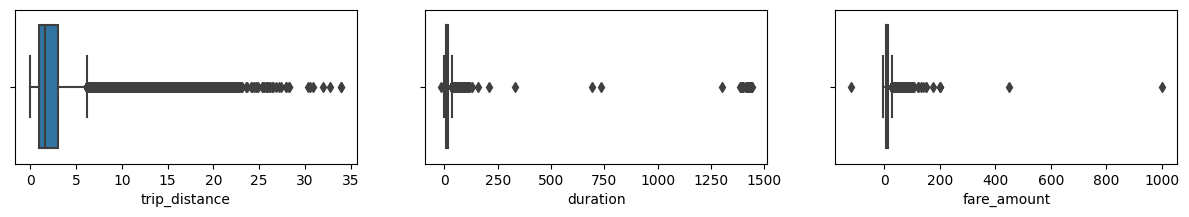

In [16]:
fig , axes = plt.subplots(1, 3, figsize=(15,2))
sns.boxplot(x=df['trip_distance'], orient='h', ax=axes[0])
sns.boxplot(x=df['duration'], orient='h', ax=axes[1])
sns.boxplot(x=df['fare_amount'], orient='h', ax=axes[2])

In [17]:
print(" Trips with distance less than or equal to 0 :",sum(df['trip_distance']<=0))

 Trips with distance less than or equal to 0 : 148


In [18]:
df.loc[df['trip_distance']<=0, 'trip_distance']=0

In [19]:
print(" Trips with distance less than or equal to 0 :",sum(df['trip_distance']<0))

 Trips with distance less than or equal to 0 : 0


In [20]:
df.loc[df['fare_amount']<=0, 'fare_amount']=0
df.loc[df['duration']<=0, 'duration']=0

In [21]:
print(sum(df['fare_amount']<0))
print(sum(df['duration']<0))

0
0


### Feature Transformation

In [22]:
def outlier_imputation(col_list, impact_factor):
    for col in col_list:
        df.loc[df[col]<=0,col]=0
    
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        max = Q3 + (IQR * impact_factor)
        print("Q1 =",Q1)
        print("Q3 =",Q3)
        print("IQR = ",IQR)
        print("maximum value : ",max)

In [23]:
outlier_imputation(['duration'],6)

Q1 = 6.65
Q3 = 18.383333333333333
IQR =  11.733333333333333
maximum value :  88.78333333333333


In [24]:
df.loc[df['duration']>88.78, 'duration']=88.73 

In [25]:
df['duration'].describe()

count    22699.000000
mean        14.460388
std         11.946005
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.730000
Name: duration, dtype: float64

In [26]:
outlier_imputation(['fare_amount'],6)

Q1 = 6.5
Q3 = 14.5
IQR =  8.0
maximum value :  62.5


In [27]:
df.loc[df['fare_amount']>62.5, 'fare_amount']=62.5

In [28]:
df['fare_amount'].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

### Feature Extraction

In [29]:
df['PULocationID'].unique()

array([100, 186, 262, 188,   4, 161,  79, 237, 234, 239, 162, 236,  13,
       209, 238, 163, 142, 263, 166, 138,  90,  43,  50, 132, 230,  24,
       140, 170, 116, 249, 246, 151, 229, 164, 141,  48, 144,  68, 107,
       114,  87, 125, 113, 211, 256, 231, 233, 255,  75,  74, 158, 148,
       264,  28, 181, 145,  42,  65, 223, 137, 143,  17, 106, 228,  41,
       208, 226, 261,  49,  40, 190,  88,  12,   7, 224, 196, 265,  97,
       244, 189, 127,  45,  33, 193, 129,  80, 260, 232,  37,  25,  83,
        61, 146, 112, 130, 134,  57, 160, 243,  93, 152,  52,   1, 235,
        56,  94,  14,  92, 179, 242, 128,  70,  35, 131,  66,  63,  36,
        29,  10,  46,  91, 118,  31, 195,  69,  85,  62, 133,  78,  82,
       216, 159,  95, 168, 173, 197, 247, 175, 225,  54, 123, 213, 258,
       202, 200, 215, 185, 218, 135, 178, 153,  55])

In [30]:
df[df['PULocationID']==100]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
52,1361166,1,2017-01-05 14:56:32,2017-01-05 15:24:31,2,2.60,1,N,100,237,2,17.5,0.0,0.5,0.00,0.0,0.3,18.30,27.983333
117,58371316,2,2017-07-09 02:27:01,2017-07-09 02:35:16,1,0.79,1,N,100,164,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,8.250000
173,32275680,1,2017-04-20 07:13:18,2017-04-20 07:29:07,1,3.30,1,N,100,236,1,13.5,0.0,0.5,2.85,0.0,0.3,17.15,15.816667
181,1731352,2,2017-01-20 19:57:42,2017-01-20 20:05:12,1,0.66,1,N,100,186,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22445,46924296,1,2017-06-10 16:16:49,2017-06-10 16:18:51,1,0.70,1,N,100,186,1,4.0,0.0,0.5,0.95,0.0,0.3,5.75,2.033333
22454,76026222,1,2017-09-10 10:22:04,2017-09-10 10:41:26,1,6.60,1,N,100,42,1,21.5,0.0,0.5,1.50,0.0,0.3,23.80,19.366667
22468,112072728,1,2017-01-05 16:03:32,2017-01-05 16:17:06,1,2.30,1,N,100,113,1,11.0,1.0,0.5,1.50,0.0,0.3,14.30,13.566667
22494,88581454,1,2017-10-20 20:02:18,2017-10-20 20:11:13,1,0.70,1,N,100,170,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,8.916667


In [31]:
df[(df['PULocationID']==100) & (df['DOLocationID']==231)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
4909,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,1,13.5,1.0,0.5,4.59,0.0,0.3,19.89,18.700000
16636,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,1,14.0,0.5,0.5,2.00,0.0,0.3,17.30,14.816667
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,28.0,0.0,0.5,0.00,0.0,0.3,28.80,47.533333
19761,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,1,13.5,0.0,0.5,2.85,0.0,0.3,17.15,17.316667
20581,49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,2,19.0,0.0,0.5,0.00,0.0,0.3,19.80,24.650000


In [32]:
df['pickup_dropoff']= df['PULocationID'].astype(str)+' '+df['DOLocationID'].astype(str)

In [33]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


In [34]:
grouped=df.groupby('pickup_dropoff').mean(numeric_only = True)[['trip_distance']]

In [35]:
grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


In [36]:
grouped_dict = grouped.to_dict()
grouped_dict

grouped_dict = grouped_dict["trip_distance"]
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [37]:
df['mean_distance'] = df['pickup_dropoff']
df['mean_distance'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: mean_distance, dtype: object

In [38]:
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

In [39]:
df['mean_distance'].head()

0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64

In [40]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


In [41]:
df[(df['PULocationID']==100) & (df['DOLocationID']==231)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
4909,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,13.5,1.0,0.5,4.59,0.0,0.3,19.89,18.700000,100 231,3.521667
16636,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,14.0,0.5,0.5,2.00,0.0,0.3,17.30,14.816667,100 231,3.521667
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,28.0,0.0,0.5,0.00,0.0,0.3,28.80,47.533333,100 231,3.521667
19761,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,13.5,0.0,0.5,2.85,0.0,0.3,17.15,17.316667,100 231,3.521667
20581,49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,...,19.0,0.0,0.5,0.00,0.0,0.3,19.80,24.650000,100 231,3.521667


In [42]:
grouped=df.groupby('pickup_dropoff').mean(numeric_only = True)[['duration']]
grouped

,duration
pickup_dropoff,
1 1,0.466667
10 148,69.366667
100 1,48.183333
100 100,3.130556
100 107,11.200000
...,...
97 65,4.483333
97 66,11.233333
97 80,23.833333


In [43]:
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
grouped_dict

{'1 1': 0.4666666666666666,
 '10 148': 69.36666666666666,
 '100 1': 48.18333333333333,
 '100 100': 3.130555555555556,
 '100 107': 11.200000000000001,
 '100 113': 14.453333333333333,
 '100 114': 15.325,
 '100 12': 17.975,
 '100 125': 17.608333333333334,
 '100 13': 31.893888888888892,
 '100 132': 35.22083333333333,
 '100 137': 9.286666666666667,
 '100 138': 44.78333333333334,
 '100 140': 19.65,
 '100 141': 13.616666666666667,
 '100 142': 11.6,
 '100 143': 10.883333333333333,
 '100 144': 22.855555555555554,
 '100 148': 33.416666666666664,
 '100 151': 15.41,
 '100 152': 19.766666666666666,
 '100 158': 11.836666666666668,
 '100 161': 8.9875,
 '100 162': 11.11590909090909,
 '100 163': 11.472000000000001,
 '100 164': 9.518333333333334,
 '100 166': 15.816666666666666,
 '100 170': 8.276666666666666,
 '100 177': 58.53333333333333,
 '100 181': 28.55,
 '100 186': 5.765873015873016,
 '100 193': 15.566666666666666,
 '100 198': 53.9,
 '100 202': 39.35,
 '100 209': 29.733333333333334,
 '100 211': 14.3

In [44]:
df['mean_duration'] = df['pickup_dropoff']


In [45]:
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

In [46]:
df['mean_duration'].head()

0    22.847222
1    24.470370
2     7.250000
3    30.250000
4    14.616667
Name: mean_duration, dtype: float64

In [47]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667


<Axes: xlabel='mean_distance', ylabel='mean_duration'>

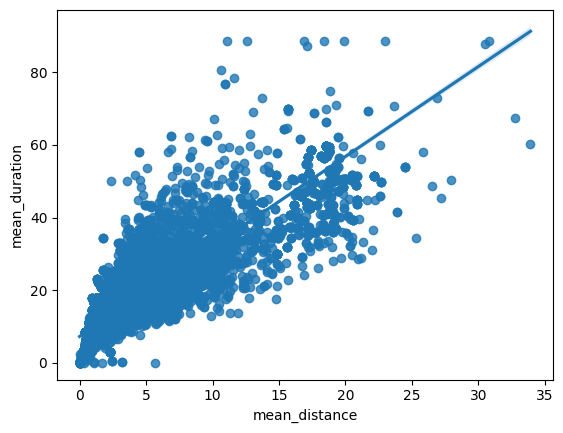

In [48]:
sns.regplot(x=df['mean_distance'], y=df['mean_duration'])

Note : 1) desrciptive analysis - avoid multicollinearity
2) prediction - can handle multicollinearity

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [50]:
df1 = df[['VendorID','mean_distance', 'mean_duration', 'fare_amount' ]]
df1.head()

,VendorID,mean_distance,mean_duration,fare_amount
0,2,3.521667,22.847222,13.0
1,1,3.108889,24.470370,16.0
2,1,0.881429,7.250000,6.5
3,2,3.700000,30.250000,20.5
4,2,4.435000,14.616667,16.5


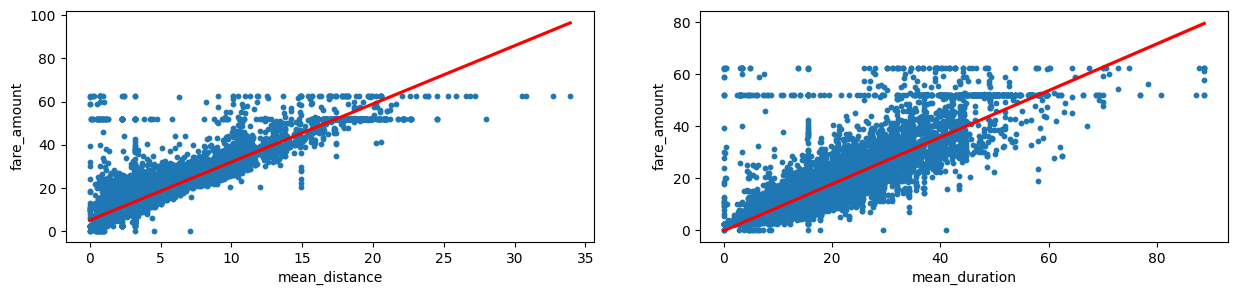

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15,3))
sns.regplot(x=df1['mean_distance'], y=df1['fare_amount'], ax=axes[0], scatter_kws={'alpha':1, 's':10}, line_kws={'color':'red'})
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'], ax=axes[1], scatter_kws={'alpha':1, 's':10}, line_kws={'color':'red'})
plt.show()


In [52]:
df1[df1['fare_amount']==52]

,VendorID,mean_distance,mean_duration,fare_amount
11,2,19.211667,40.491111,52.0
110,1,19.229000,52.941667,52.0
161,2,2.255862,3.021839,52.0
247,2,19.431667,47.275000,52.0
379,2,17.654000,49.833333,52.0
...,...,...,...,...
22593,1,16.580000,61.691667,52.0
22604,1,18.148750,56.850000,52.0
22620,2,22.115000,51.493750,52.0
22686,2,10.640000,80.750000,52.0


In [53]:
df1.corr("pearson")

,VendorID,mean_distance,mean_duration,fare_amount
VendorID,1.000000,0.004741,0.001875,0.001045
mean_distance,0.004741,1.000000,0.874875,0.910185
mean_duration,0.001875,0.874875,1.000000,0.859117
fare_amount,0.001045,0.910185,0.859117,1.000000


<Axes: >

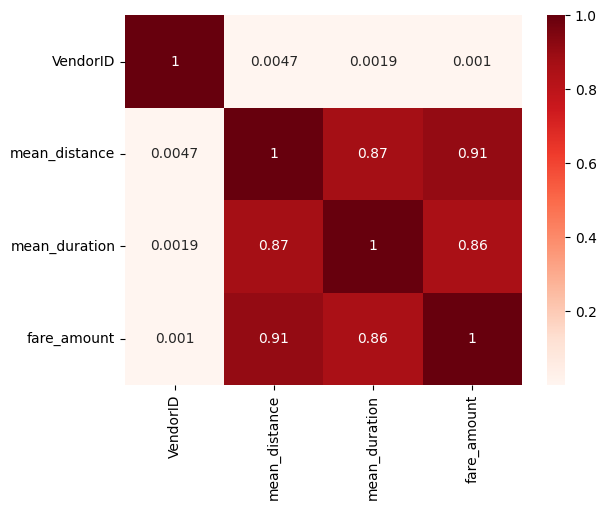

In [54]:
sns.heatmap(data=df1.corr("pearson"), annot=True, cmap="Reds")

## Split test and train data

In [55]:
X = df1[['mean_distance', 'mean_duration']]
Y = df1['fare_amount']

In [56]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=112)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_Scaler = scaler.transform(X_train)

## Model Building

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_Scaler, y_train)

LinearRegression()

In [59]:
X_test_scaler = scaler.transform(X_test)

In [60]:
y_pred = lr.predict(X_test_scaler)

## Evaluate results

In [61]:
from sklearn.metrics import r2_score

print("R2 score", r2_score(y_test, y_pred))

R2 score 0.8402059929479959
